In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import numpy.random as npr
import plotly as py
import plotly.offline as pyo
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split, GridSearchCV
import requests

In [2]:
import requests

url = "https://www.openml.org/data/download/22102255/dataset"
r = requests.get(url, allow_redirects=True)

with open("dataset_.txt", "wb") as f:
    f.write(r.content)


In [ ]:
# data extracten
data = []
with open("dataset_.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line.strip() == "":
            continue
        data.append(line)

In [4]:
colomnus = []

with open("dataset_.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            colomnus.append(line.split(" ")[1])

In [5]:
with open("df.csv", "w") as f:
    f.write(",".join(colomnus))
    f.write("\n")
    f.write("\n".join(data))

In [6]:
df = pd.read_csv("df.csv")

df.columns = colomnus

In [7]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [9]:
# verander de binaire variabelen
df["bomb_planted"] = df["bomb_planted"].map({True: 1, False: 0})
df["round_winner"] = df["round_winner"].map({"T": 1, "CT": 0})

df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,de_dust2,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,de_dust2,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
import plotly.graph_objs as go
import numpy as np

corr = df.corr(numeric_only=True)

heatmap = go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale="RdBu",
    zmin=-1, zmax=1,
    colorbar=dict(title="Correlation")
)

fig = go.Figure(data=[heatmap])
fig.update_layout(title="Correlation Heatmap", width=800, height=700)
fig.show()


In [ ]:
# alleen numerical values
numeric_cols = [col for col in df.columns if df[col].dtype in ["int64", "float64"]]
correlations = df[numeric_cols].corr()

# wij pakken de 25 meest correleerde waardes 
top_corrs = correlations["round_winner"].apply(abs).sort_values(ascending=False).iloc[:25]
print(top_corrs)


round_winner                    1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [12]:
seleceted_colums = []

for col in colomnus+["round_winner"]:
    try:
        if abs(correlations[col]["round_winner"]) > 0.15:
            seleceted_colums.append(col)
    except KeyError:
        pass
df_selected = df[seleceted_colums]

In [13]:
df_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,round_winner,round_winner
0,0,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,1,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,...,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1,1
122406,0,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,...,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1,1
122407,0,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1,1
122408,0,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1,1


In [14]:
import plotly.graph_objs as go
import numpy as np

corr = df_selected.corr(numeric_only=True)

heatmap = go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale="RdBu",
    zmin=-1, zmax=1,
    colorbar=dict(title="Correlation")
)

fig = go.Figure(data=[heatmap])
fig.update_layout(title="Correlation Heatmap", width=800, height=700)
fig.show()

array([[<Axes: title={'center': 'bomb_planted'}>,
        <Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>,
        <Axes: title={'center': 't_weapon_ak47'}>],
       [<Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>,
        <Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>],
       [<Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 'ct_grenade_flashbang'}>,
        <Axes: title={'center': 't_grenade_flashbang'}>,
        <Axes: title={'center': 'ct_grenade_smokegrenade'}>,
        <Ax

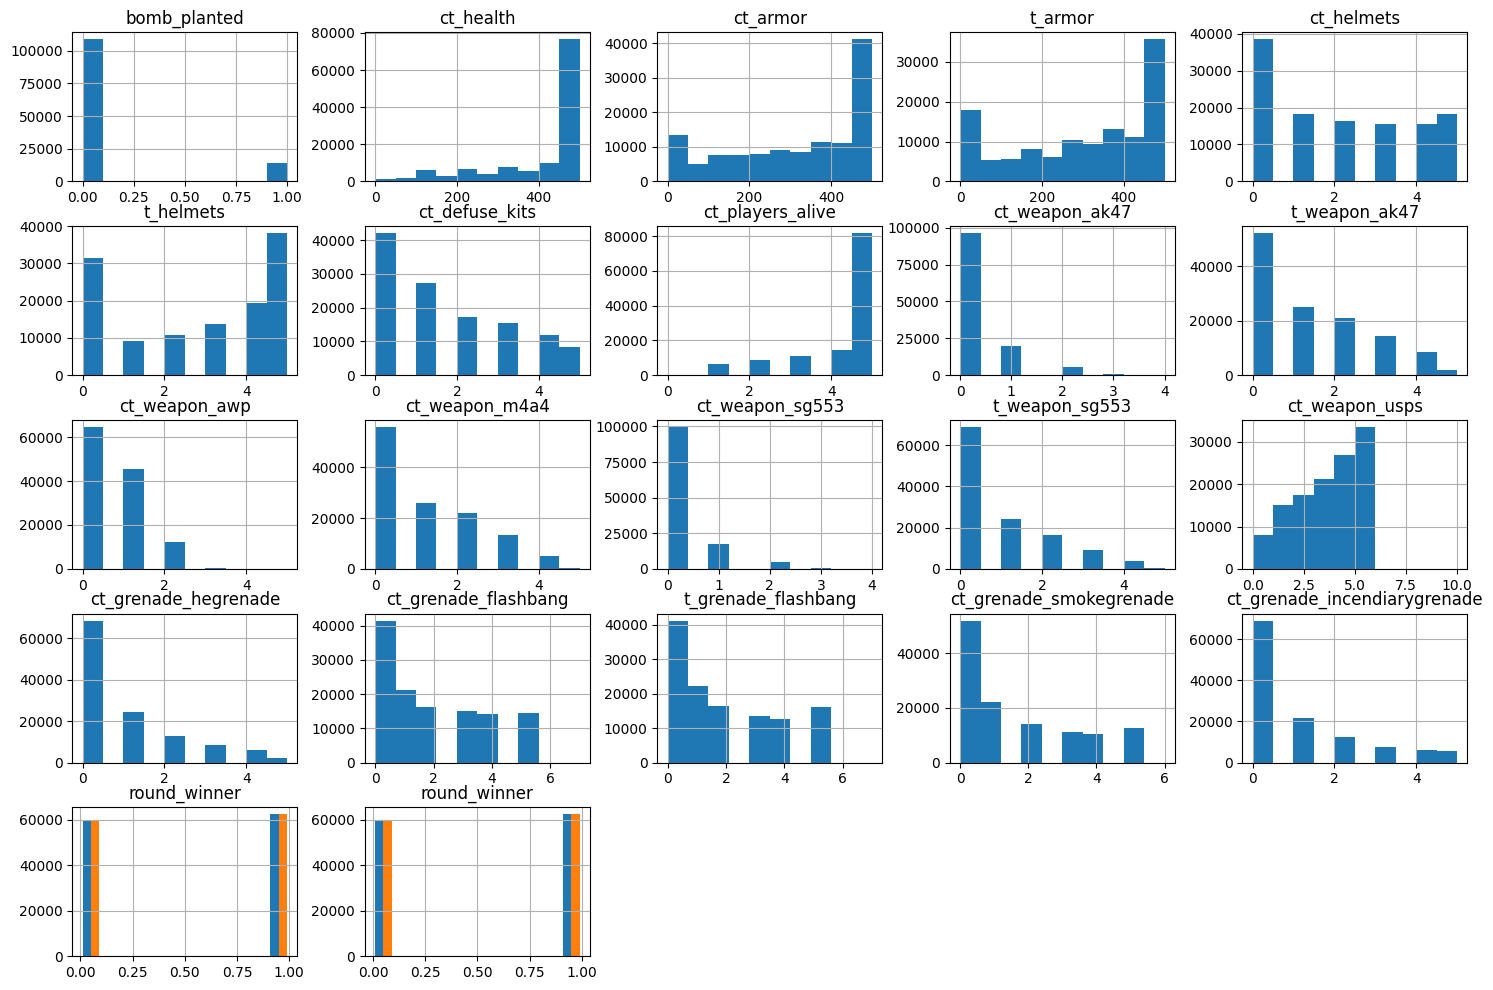

In [15]:
df_selected.hist(figsize=(18,12))

In [ ]:
#split data
from sklearn.model_selection import train_test_split

X = df_selected.drop("round_winner", axis=1)
y = df_selected["round_winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaller = StandardScaler()

X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [ ]:
#knn model score
knn.score(X_test_scaled, y_test)

0.7309758189690385

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(5, 17, 2)),
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

clf = RandomizedSearchCV(knn, param_grid, n_jobs=4, n_iter=3, verbose=2, cv=3)
clf.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=3, n_jobs=4,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [20]:
knn = clf.best_estimator_

In [ ]:
#beste knn waarde
knn.score(X_test_scaled, y_test)

0.7443938403725185

In [ ]:
#randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

r_forest = RandomForestClassifier()

r_forest.fit(X_train_scaled, y_train)
r_forest.score(X_test_scaled, y_test)


0.7740176456171881

In [ ]:
#hyper parameter tuning
param_dist = {
    'n_estimators': [100, 300, 500, 800, 1000, 1500],
    'max_depth': [10, 20, 30, 40, 50, 60, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]  # None = all features
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

best_rf = random_search.best_estimator_

accuracy = best_rf.score(X_test_scaled, y_test)
print("Best Params:", random_search.best_params_)
print("Test Accuracy:", accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 60}
Test Accuracy: 0.7758557307409525


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

r_forest = RandomForestClassifier(n_jobs=4)

r_forest.fit(X_train_scaled, y_train)
r_forest.score(X_test_scaled, y_test)

0.7729250061269504